In [974]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [976]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [977]:
df.shape

(730, 16)

In [978]:
#checking for null from info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [979]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [980]:
#Dropping unnecessary columns
# dropping the column 'Instant' as it contains row numbers
# Count contains both 'causal + registered' so dropping casual and registered users
# dteday has date, month and year and we already have derived columns month and year so dropping dteday
df.drop(columns = ['instant','casual','registered','dteday'],inplace = True)

In [981]:
df.shape

(730, 12)

In [982]:
#Encoding columns[season,mnth,weekday,weathersit] acc to the data dict
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [984]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [992]:
df['mnth'] = df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [993]:
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [995]:
df['weathersit'] = df['weathersit'].map({1: 'Clear',2: 'Cloudy_mist',3: 'Light_Rain_Thunder',4: 'Heavy_Rain_thunder'})

In [998]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1002]:
#VISUALISATION OF DATA

In [1004]:
#Visualising for categorical vars against target(cnt)
cat_predictors = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

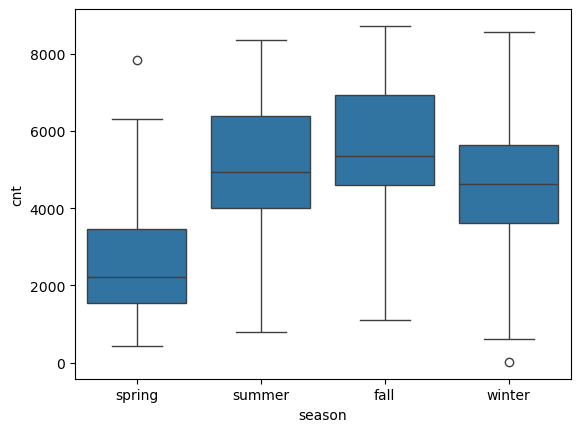

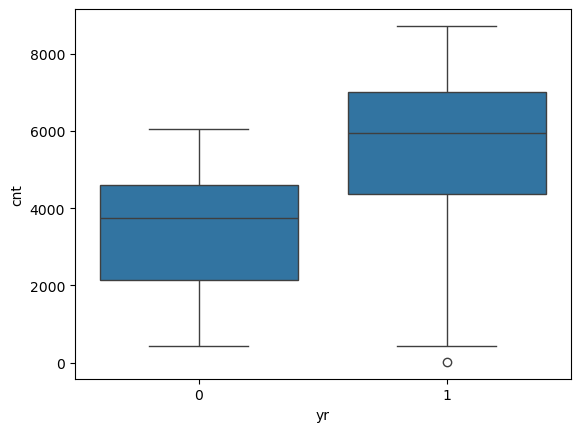

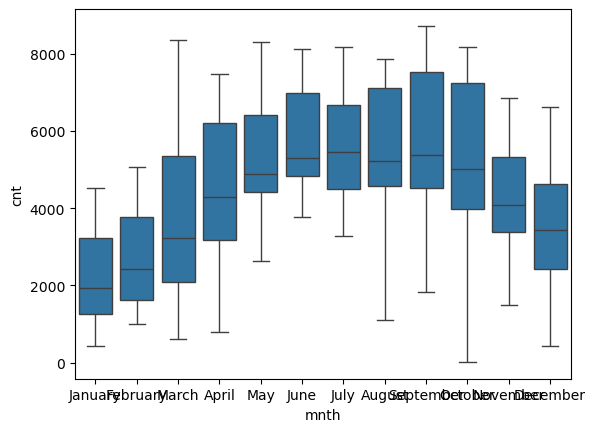

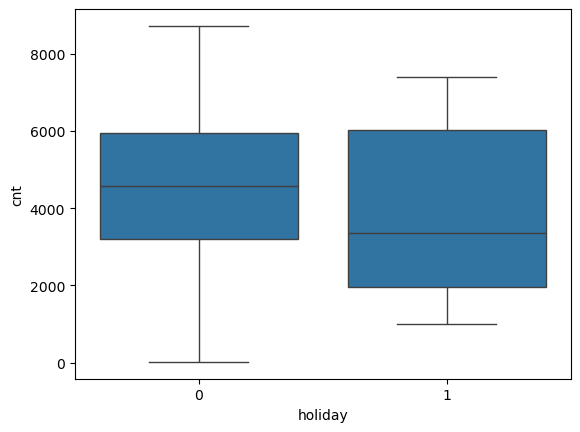

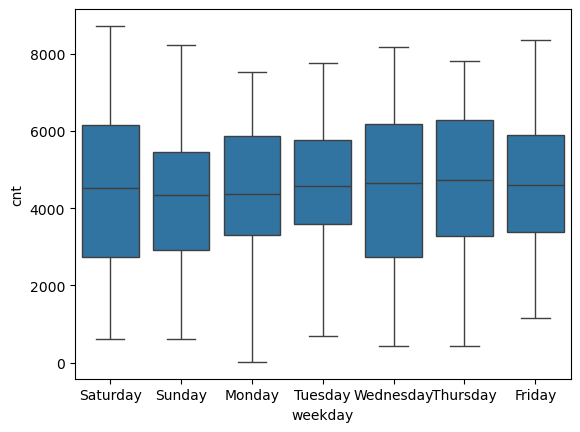

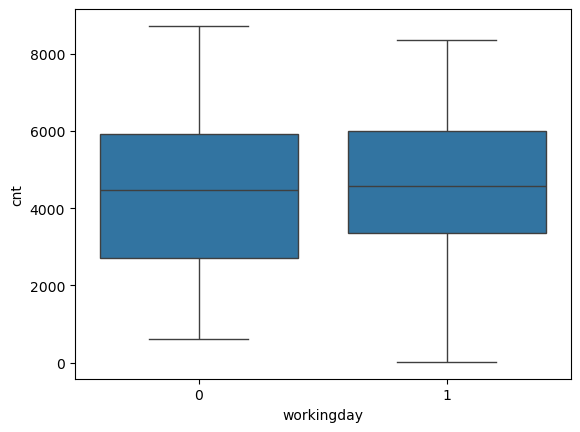

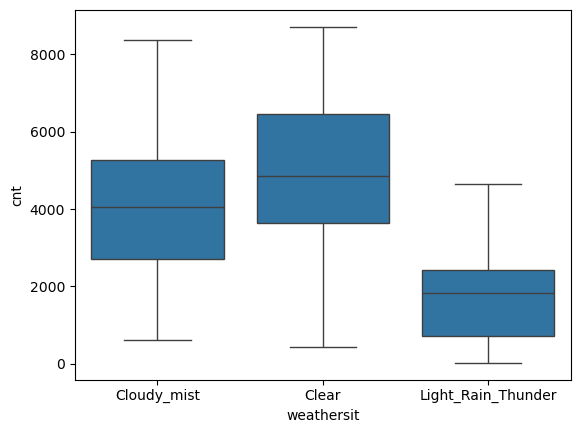

In [1006]:
for predictor in cat_predictors:
    sns.boxplot(data=df,x=predictor,y='cnt')
    plt.show()

## OBSERVATIONS
1. During fall average rentals are high next goes to summer
2. From 2018 to year 2019, there was increase in average bikes by nearly 2000
3. In month of september there were more number of rentals. The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.
4. Suprisingly holidays had lower rentals compared to weekdays
5. Across weekdays there is no significant difference in rentals [similar mean and counts]
6. During clear weather rentals are higher

In [1008]:
# From plot we can observe that there is an outlier in Spring. 
# Median is around 2k. At around 7k there is an outlier so we can drop this one row.
df_filtered = df[(df['season'] == 'spring') & (df['cnt'] > 7000)]
# Dropping row
df.drop(df[(df.season == "spring") & (df.cnt > 7000)].index,inplace=True)

In [1009]:
df.shape

(729, 12)

In [1010]:
#check for Correlation amongst numerical varaibles
df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991701,0.128512,-0.158159,0.628085
atemp,0.991701,1.000000,0.141362,-0.183750,0.631541
hum,0.128512,0.141362,1.000000,-0.247551,-0.100930
windspeed,-0.158159,-0.183750,-0.247551,1.000000,-0.233346
cnt,0.628085,0.631541,-0.100930,-0.233346,1.000000


In [1011]:
# High correlation with cnt is observed with atemp and temp

In [1012]:
#due to high correlation of atemp with temp dropping column atemp
#which avoids redundancy and overfitting
df.drop(columns=['atemp'],inplace=True)

In [1013]:
df.shape

(729, 11)

Text(0.5, 1.0, 'Correlation amongst numerical variables')

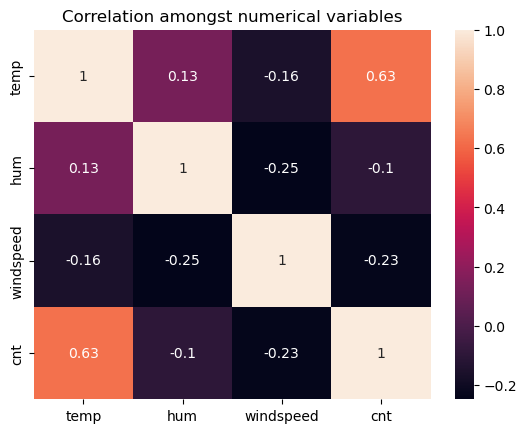

In [1014]:
#Correlation amongst numerical variables in a plot
sns.heatmap(df[['temp','hum','windspeed','cnt']].corr(),annot=True)
plt.title("Correlation amongst numerical variables")

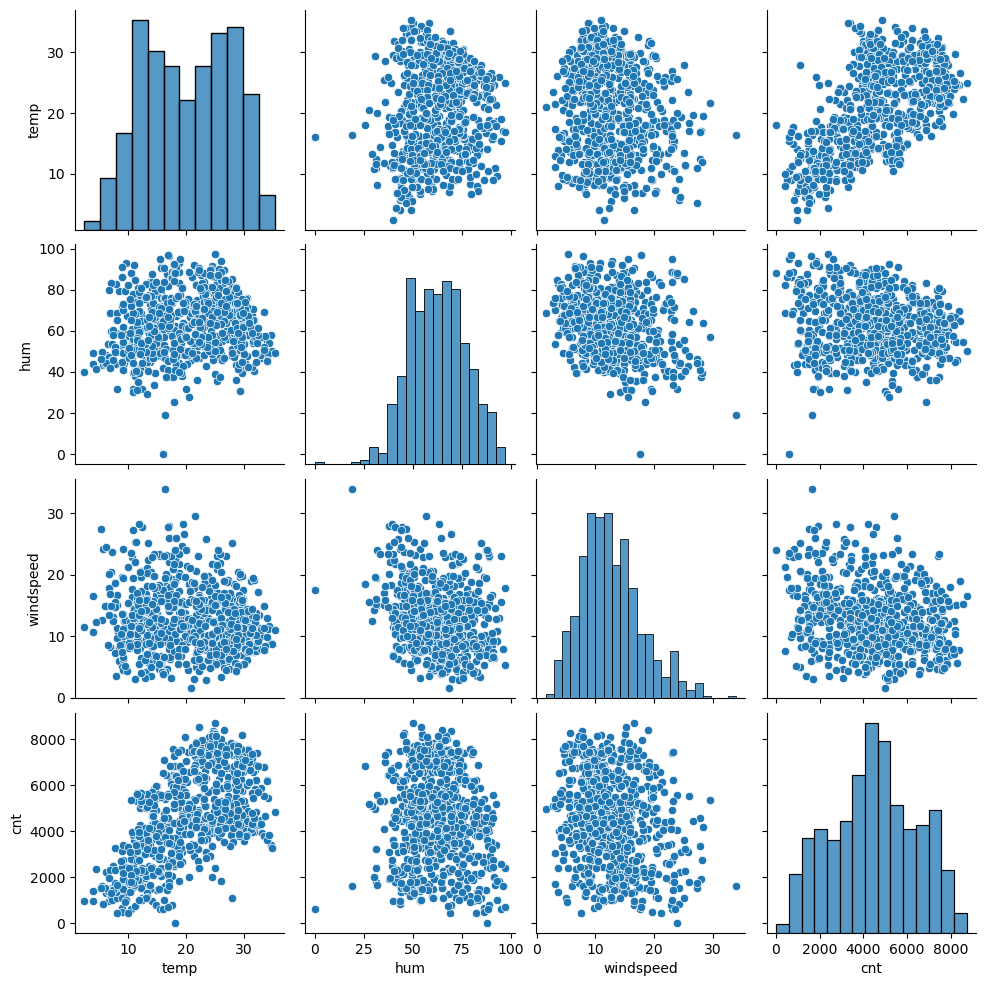

In [1015]:
#Pairplot 
sns.pairplot(df,vars=["temp","hum","windspeed","cnt"])

In [1016]:
#cnt vs temp plot looks linearly well

### DATA PREPARATION

In [1019]:
# Creating dummy variables for season, mnth, weekday, weathersit
season_dummy = pd.get_dummies(df['season'],drop_first=True)
mnth_dummy = pd.get_dummies(df['mnth'],drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first=True)

In [1020]:
#Concatenation with dummy varaibles 
df_upd = pd.concat([df,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)
#dropping original columns
df_upd.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [1021]:
df_upd.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,0,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### SPLITTING THE DATA INTO TRAINING AND TESTING DATA SETS

In [1023]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [1024]:
np.random.seed(30)
df_train, df_test = train_test_split(df_upd, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1025]:
#Check shape of both test and train datasets

In [1027]:
df_train.shape

(510, 29)

In [1028]:
df_test.shape

(219, 29)

In [1029]:
# Using MinMaxScaler to Rescaling the features
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler
#Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

In [1030]:
# Apply scaler to numerical columns
numerical_cols =  ['temp','hum','windspeed']
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

In [1031]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,0.614763,0.553027,0.371638,7591,False,False,False,...,False,True,False,False,False,False,False,True,False,False
363,0,0,1,0.314673,0.656076,0.197852,2999,True,False,False,...,False,False,False,False,False,False,False,False,False,False
425,1,0,1,0.366591,0.677114,0.220569,3194,True,False,False,...,False,False,False,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,1796,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,4220,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [1032]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.021569,0.676471,0.539048,0.648381,0.315400,4517.092157
std,0.500395,0.145413,0.468282,0.227284,0.145999,0.170073,1968.461206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000
25%,0.000000,0.000000,0.000000,0.336738,0.538643,0.195527,3132.000000
50%,1.000000,0.000000,1.000000,0.545711,0.649205,0.285417,4540.000000
75%,1.000000,0.000000,1.000000,0.739627,0.755904,0.406426,6111.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


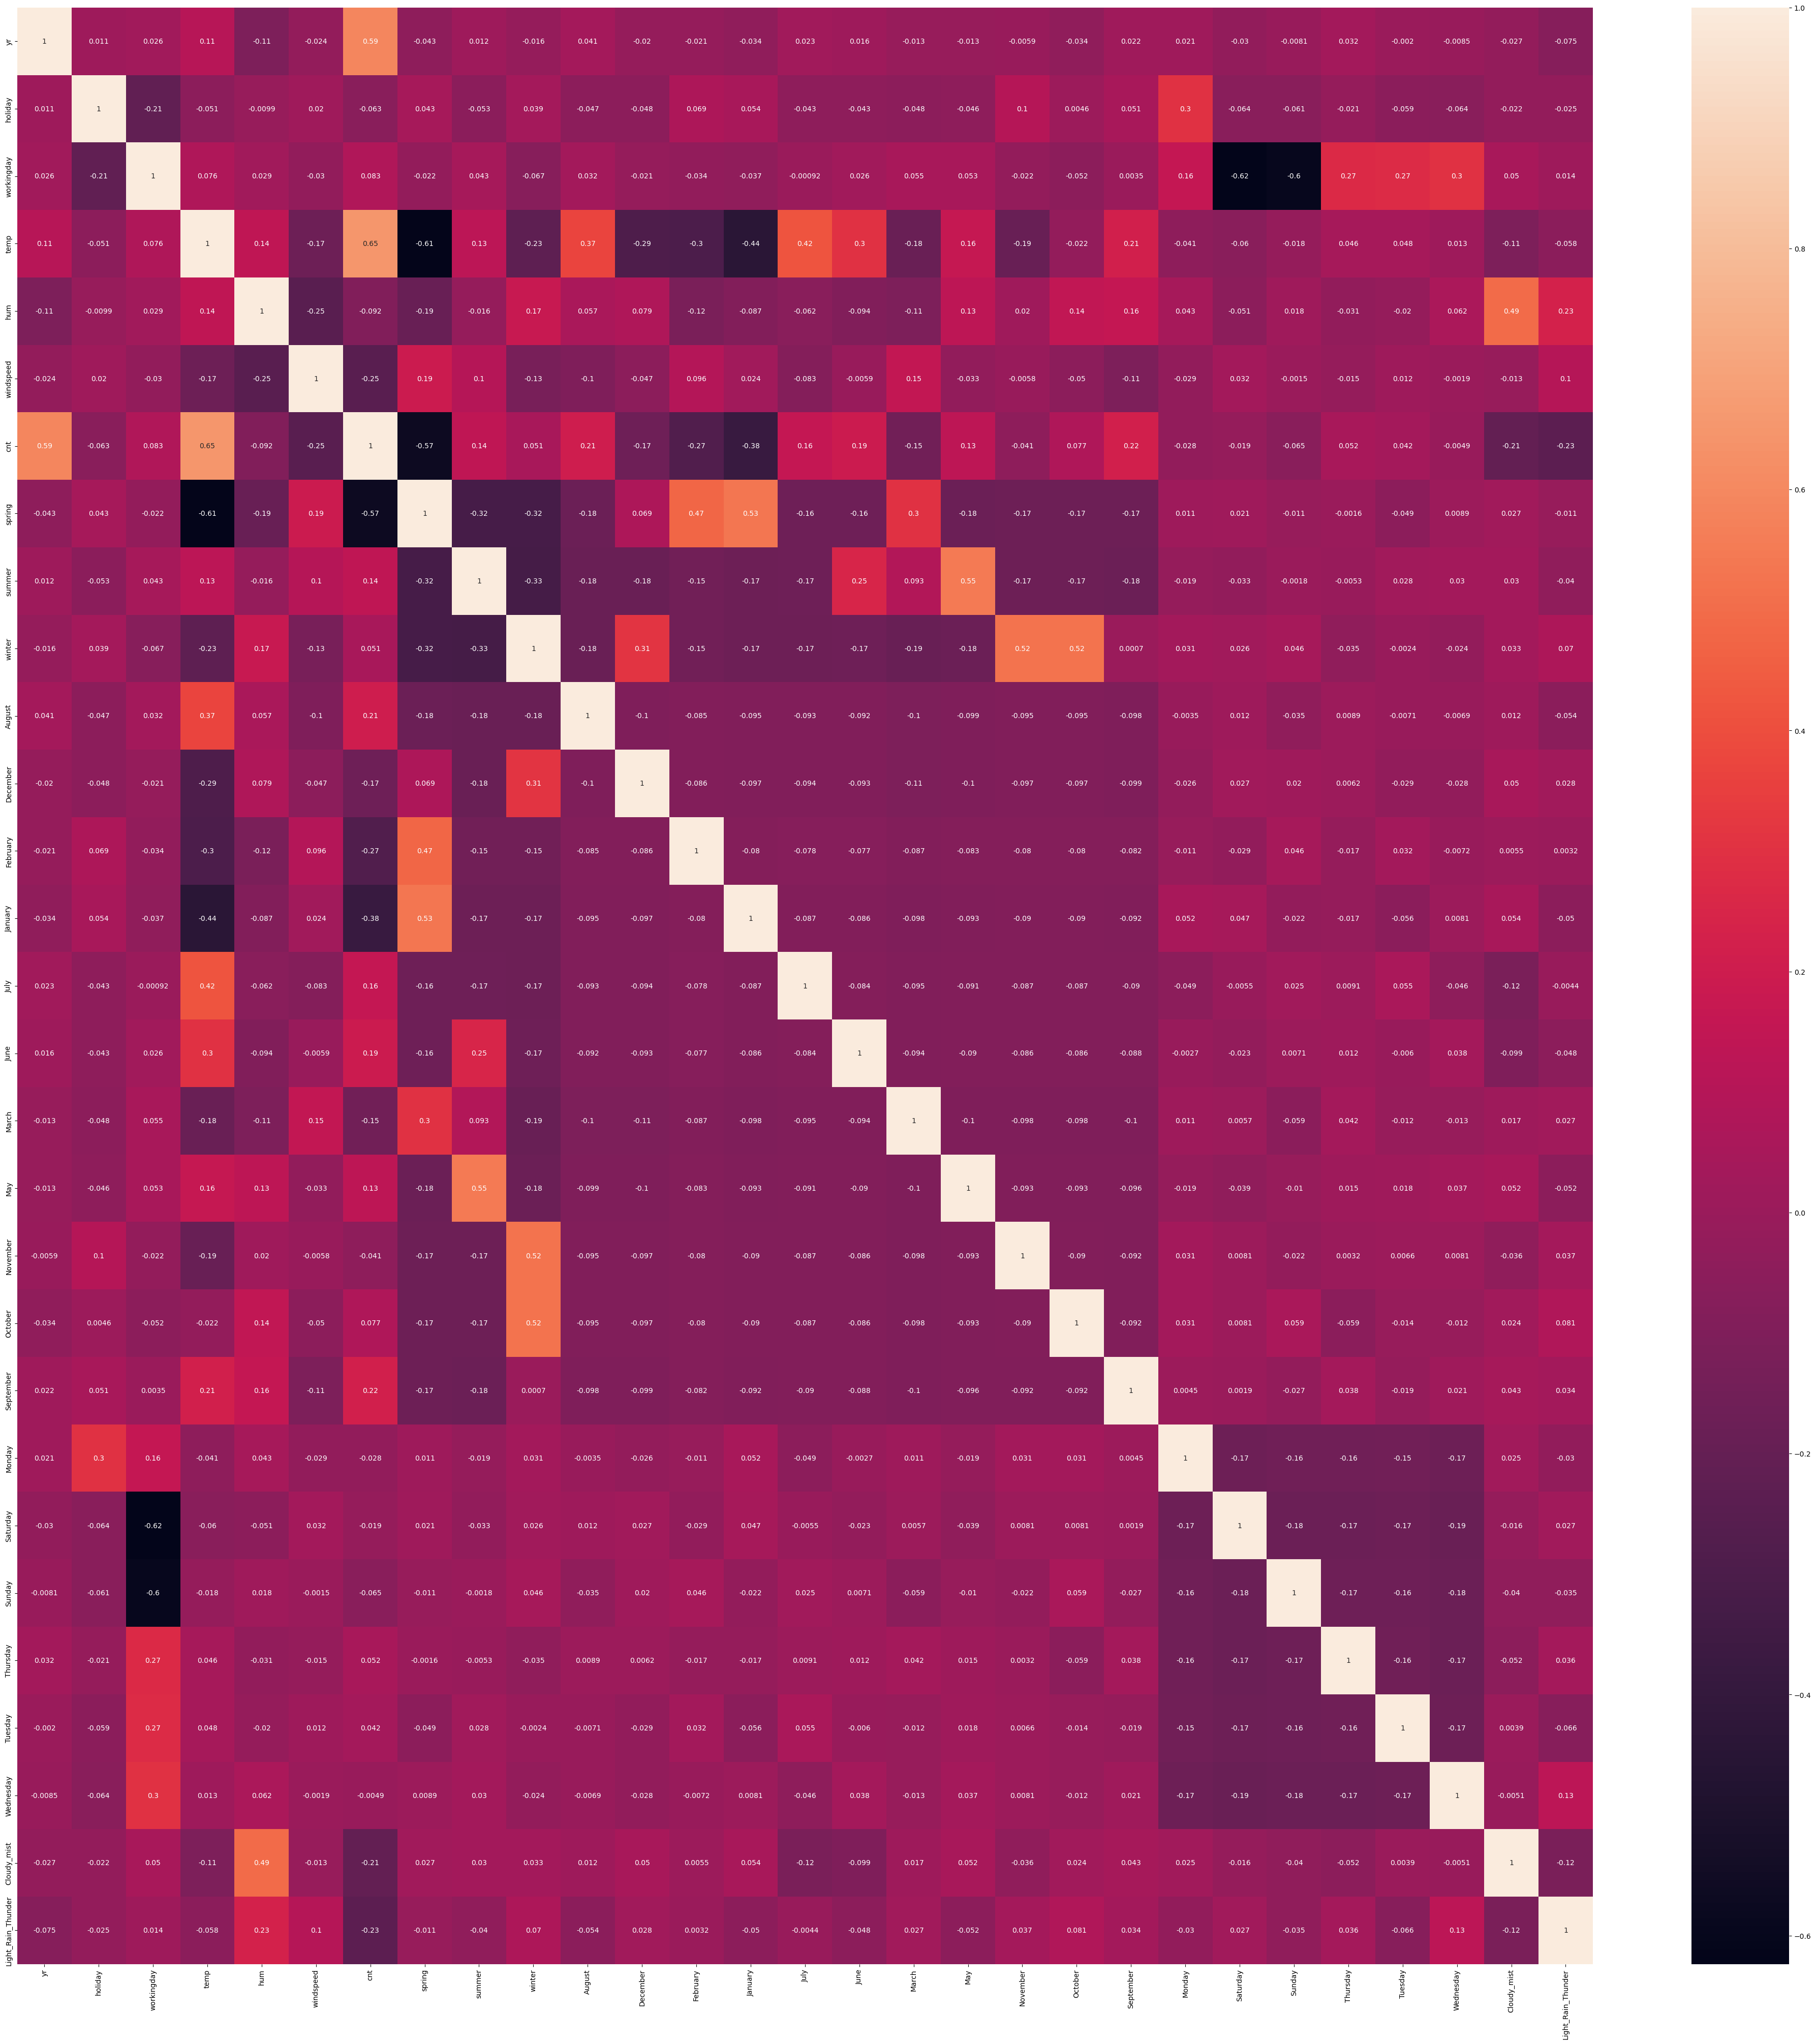

In [1033]:
plt.figure(figsize=(50,50))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [1034]:
# Lighter shades indicates high correlation
# cnt with year and temp has good correlation. 
# Misty and humidity has correlation. 
# Spring season with months Jan and Feb, Summer season with may and Winter with oct and nov months shows correlation.

### BUILDING A LINEAR MODEL

In [1037]:
y_train = df_train.pop('cnt')
x_train = df_train


##### Model 1 - Linear regression

In [1039]:
#Fitting a regression line through the data using statsmodel

# Import the statsmodels library
import statsmodels.api as sm

# Add a constant column to the DataFrame 'x_train' containing only the "temp" feature
x_train_lm = sm.add_constant(x_train[["temp"]])

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr = sm.OLS(y_train, x_train_lm).fit()

In [1040]:
lr.params

const    1479.084302
temp     5635.880972
dtype: float64

In [1041]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     373.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           9.67e-63
Time:                        14:56:38   Log-Likelihood:                -4451.1
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1479.0843    170.662      8.667      0.0

In [1042]:
# observations
# R-squared: 0.423
# F-statistic: 373.1

##### Model 2 - multiple linear regression with all varaibles

In [1048]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [1050]:
# Add a constant column to the DataFrame 'x_train' using statsmodels
x_train_lm = sm.add_constant(x_train)

In [1051]:
# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr = sm.OLS(y_train, x_train_lm.astype(float)).fit()

In [1052]:
mlr.params

const                 2272.950849
yr                    1994.471966
holiday                246.436736
workingday             842.552011
temp                  3841.224035
hum                  -1511.633411
windspeed            -1396.721277
spring                -584.284326
summer                 276.479472
winter                 873.404092
August                 150.436600
December              -357.026919
February              -218.427324
January               -415.574415
July                  -352.209712
June                    66.568165
March                   61.642568
May                    324.313310
November              -394.877353
October                147.427871
September              736.579928
Monday                -190.026873
Saturday               817.869430
Sunday                 366.092672
Thursday               -89.135871
Tuesday               -132.722775
Wednesday              -73.122740
Cloudy_mist           -550.770690
Light_Rain_Thunder   -1985.471058
dtype: float64

In [1053]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.54e-189
Time:                        14:56:39   Log-Likelihood:                -4084.8
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     482   BIC:                             8344.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2272.9508    296

In [1054]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1055]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Feature'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.astype(float).values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,workingday,84.34
21,Saturday,19.39
22,Sunday,18.21
6,spring,9.88
8,winter,8.30
7,summer,7.82
3,temp,7.07
17,November,6.29
9,August,6.11
18,October,6.10


In [1056]:
# Some features have high VIF values and high p-values so its better to use RFE recursive feature elimination to decide the best variables
# High VIF means feature is highly redundant with other features (multicollinear)
# High p-value indicates statistically insignificant [ No strong relationship with target variable]

# APPROACH:
# First Identify and remove features with high VIF, refit the model later will check for p-value
# VIF less than 5 is acceptable, indicating low multicollinearity. So some columns have to be removed first later check for p-value <0.05 

In [1062]:
# Using RFE recursive feature elimination to decide best variables

In [1071]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE
lm = LinearRegression()
lm.fit(x_train, y_train)

# Assuming x_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(x_train, y_train)

In [1073]:
rfe_table=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
22,Sunday,True,1
21,Saturday,True,1
19,September,True,1
17,November,True,1
16,May,True,1
14,June,True,1
26,Cloudy_mist,True,1
12,January,True,1
11,February,True,1


In [1074]:
# Columns based on RFE
selected_features= x_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'August', 'December', 'February', 'January', 'June', 'May',
       'November', 'September', 'Saturday', 'Sunday', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [1075]:
#selected feature for model creation
x_train_rfe = x_train[selected_features]

In [1076]:
x_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,winter,August,December,February,January,June,May,November,September,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,0.614763,0.553027,0.371638,False,False,False,False,False,False,False,False,False,True,False,False,False,False
363,0,0,1,0.314673,0.656076,0.197852,False,False,False,True,False,False,False,False,False,False,False,False,False,False
425,1,0,1,0.366591,0.677114,0.220569,False,False,False,False,False,False,False,False,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,False,False,False,True,False,False,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.504508,0.188475,True,False,False,False,False,False,False,False,False,False,True,False,True,False


##### Model 3 - Using RFE

In [1085]:
# Add only selected features to the model

In [1091]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr3 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.06e-195
Time:                        14:56:42   Log-Likelihood:                -4089.6
No. Observations:                 510   AIC:                             8219.
Df Residuals:                     490   BIC:                             8304.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1911.8832    222

In [1096]:
# CALCULATE VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Feature'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
2,workingday,44.54
16,Saturday,10.80
17,Sunday,10.63
3,temp,3.55
1,holiday,2.56
6,summer,2.51
11,January,2.30
7,winter,2.26
4,hum,1.97
10,February,1.78


##### MODEL 4 - REMOVE COLUMN WITH HIGH VIF

In [1106]:
# Removing workingday as it has high 'VIF'

In [1108]:
# Drop column "workingday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["workingday"], axis=1, inplace=True)

In [1110]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr4 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.06e-195
Time:                        14:57:31   Log-Likelihood:                -4089.6
No. Observations:                 510   AIC:                             8219.
Df Residuals:                     490   BIC:                             8304.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2628.2734    269

In [1112]:
# CALCULATE VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Feature'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
3,hum,25.67
2,temp,17.00
4,windspeed,3.99
5,summer,2.97
6,winter,2.91
17,Cloudy_mist,2.30
0,yr,2.08
10,January,1.90
12,May,1.84
13,November,1.83


##### MODEL 5 - REMOVE COLUMN WITH HIGH VIF

In [1115]:
# Removing hum as it has high 'VIF' 

In [1117]:
# Drop the column "hum" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["hum"], axis=1, inplace=True)

In [1119]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr5 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.43e-191
Time:                        14:58:13   Log-Likelihood:                -4101.5
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     491   BIC:                             8321.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1833.0006    218

In [1121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.45
3,windspeed,3.97
4,summer,2.67
5,winter,2.55
0,yr,2.08
11,May,1.84
12,November,1.76
6,August,1.70
16,Cloudy_mist,1.58
10,June,1.52


##### MODEL 6 - REMOVE COLUMN WITH HIGH p-value

In [1124]:
# Removing the variable Saturday based on its Very High 'p' value.

In [1126]:
# Drop the column "Saturday" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["Saturday"], axis=1, inplace=True)

In [1130]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr6 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.56e-192
Time:                        14:59:17   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     492   BIC:                             8316.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1853.0221    217

In [1132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.397161
3,windspeed,3.941907
4,summer,2.667561
5,winter,2.534999
0,yr,2.075012
11,May,1.840101
12,November,1.755993
6,August,1.698935
15,Cloudy_mist,1.578106
10,June,1.524218


##### MODEL 8 - REMOVE COLUMN WITH HIGH p-value

In [1135]:
# Removing col June as it has high p-value

In [1137]:
# Drop the columns "June" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["June"], axis=1, inplace=True)

In [1141]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr8 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.51e-193
Time:                        14:59:35   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     493   BIC:                             8312.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1783.5820    212

In [1143]:
# Removing col May as it has high p-value

In [1145]:
# Drop the columns "May" from the DataFrame 'x_train_rfe'
x_train_rfe.drop(["May"], axis=1, inplace=True)

In [1147]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm = sm.add_constant(x_train_rfe)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
mlr9 = sm.OLS(y_train, x_train_lm.astype(float)).fit()

# Print the summary of the regression model
print(mlr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.49e-194
Time:                        14:59:38   Log-Likelihood:                -4103.7
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     494   BIC:                             8307.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1758.3865    211

In [1151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.159787
3,windspeed,3.797668
5,winter,2.489496
0,yr,2.061308
4,summer,1.982696
10,November,1.754284
6,August,1.576906
13,Cloudy_mist,1.566893
7,December,1.441097
11,September,1.371887


##### Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions this model only.

In [1154]:
# Residual Analysis of the train data
## To check if error terms are normally distributed 

In [1156]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_sm = sm.add_constant(x_train_rfe)

In [1158]:
# Predict the target variable 'y_train' using the trained regression model 'mlr_11' and the DataFrame 'x_train_sm'
y_train_pred = mlr9.predict(x_train_sm)

Text(0.5, 0, 'Errors')

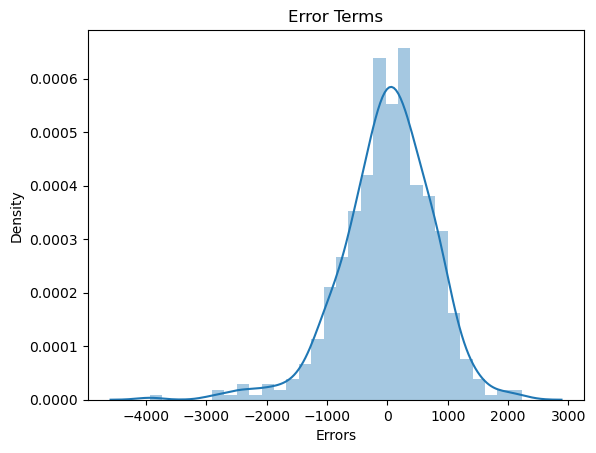

In [1164]:
# Hist plot to check the error terms
sns.distplot((y_train - y_train_pred), bins = 30)
plt.title('Error Terms')
plt.xlabel('Errors')

In [1166]:
# Make Predictions Using the Final Model

In [1168]:
# Apply scaler to all numerical columns
numerical_col = ['temp','hum','windspeed']

df_test[numerical_col] = scaler.fit_transform(df_test[numerical_col])

In [1170]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.703196,0.542041,0.488586,0.430648,4471.652968
std,0.500513,0.209229,0.457896,0.246069,0.211414,0.184891,1853.207583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.000000,0.327372,0.331197,0.297516,3235.500000
50%,0.000000,0.000000,1.000000,0.533865,0.479853,0.412774,4586.000000
75%,1.000000,0.000000,1.000000,0.750878,0.629028,0.534298,5635.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8227.000000


In [1172]:
y_test = df_test.pop('cnt')
x_test = df_test

In [1174]:
# Adding constant variable to test dataframe
x_test_mlr9 = sm.add_constant(x_test)

In [1218]:
x_train_rfe.head()

,yr,holiday,temp,windspeed,summer,winter,August,December,February,January,November,September,Sunday,Cloudy_mist,Light_Rain_Thunder
626,1,0,0.614763,0.371638,False,False,False,False,False,False,False,True,False,False,False
363,0,0,0.314673,0.197852,False,False,False,True,False,False,False,False,False,False,False
425,1,0,0.366591,0.220569,False,False,False,False,False,False,False,False,False,True,False
728,1,0,0.245101,0.663106,False,False,False,True,False,False,False,False,True,False,False
482,1,0,0.395666,0.188475,True,False,False,False,False,False,False,False,False,True,False


In [1178]:
x_test_mlr10= x_test_mlr9[['yr', 'holiday', 'temp', 'windspeed', 'summer',	'winter', 'August',	'December', 'February', 'January', 'November', 'September', 'Sunday', 'Cloudy_mist', 'Light_Rain_Thunder']]

In [1180]:
# checking X_test_mlr10
x_test_mlr10.head()

,yr,holiday,temp,windspeed,summer,winter,August,December,February,January,November,September,Sunday,Cloudy_mist,Light_Rain_Thunder
184,0,1,0.837241,0.147996,False,False,False,False,False,False,False,False,False,True,False
639,1,0,0.656765,0.205594,False,True,False,False,False,False,False,False,False,False,True
299,0,0,0.496221,0.439252,False,True,False,False,False,False,False,False,False,True,False
221,0,0,0.890387,0.445501,False,False,True,False,False,False,False,False,False,False,False
152,0,0,0.821739,0.676005,True,False,False,False,False,False,False,False,False,False,False


In [1182]:
# Adding constant 
x_test_mlr10 = sm.add_constant(x_test_mlr10)

In [1184]:
y_test_pred_mlr10 = mlr9.predict(x_test_mlr10)

In [1186]:
# Model Evaluation

Text(0, 0.5, 'y_pred_mlr10')

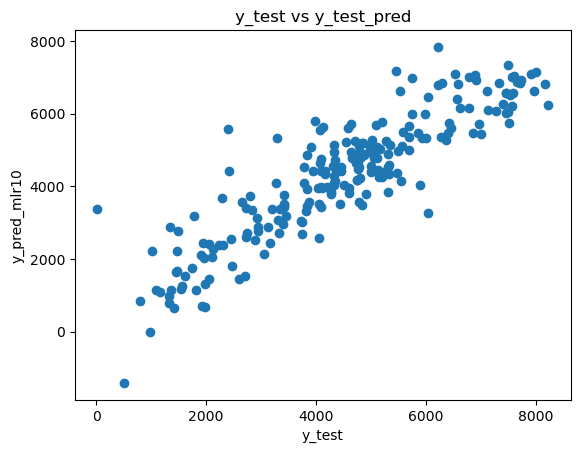

In [1190]:
plt.scatter(y_test, y_test_pred_mlr11)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred_mlr10')

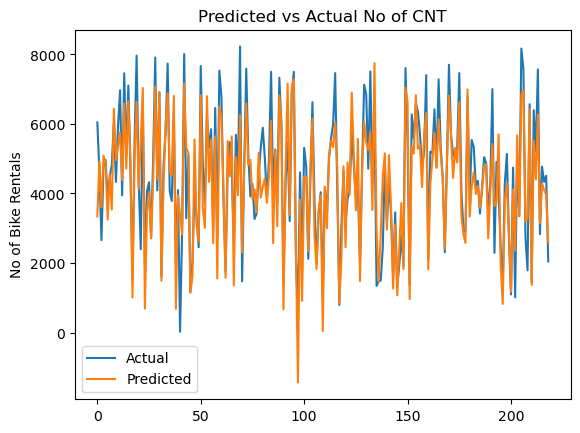

In [1192]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred_mlr10)),y_test_pred_mlr10)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.show()

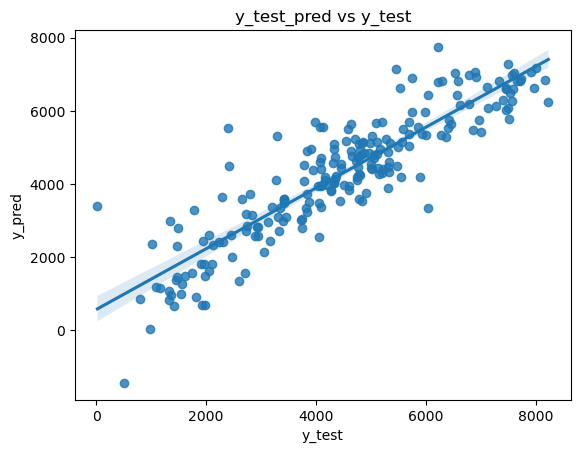

In [1220]:
# Visualizing the fit on the test data
# plotting Regression plot

y_test_pred_mlr10 = np.array(y_test_pred_mlr10, dtype=float)
plot = sns.regplot(x=y_test, y=y_test_pred_mlr10, fit_reg=True)
plt.title('y_test_pred vs y_test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [1222]:
# CHECKING R-SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

mse = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr10))
rsquared_test = r2_score(y_test, y_test_pred_mlr10)
rsquared_train = r2_score(y_train, y_train_pred)

In [1224]:
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8523805943359625
R-squared for test data: 0.7848396857420321
Mean Squared Error 857.652


In [1226]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_test_pred_mlr10)
r_squared

0.7848396857420321

In [1244]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r_squared)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),3)
print(adjusted_r2)

0.753


In [1236]:
mlr9.params.to_frame().round(2)

,0
const,1758.39
yr,2019.01
holiday,-703.35
temp,3881.28
windspeed,-1184.13
summer,705.70
winter,1227.77
August,398.04
December,-503.28
February,-407.01


#### Regression equation
Cnt = 1758.39 + 2019.01 * yr - 703.35 * holiday + 3881.28 * temp - 1184.13 * windspeed + 705.70 * summer + 1227.77 * winter + 398.04 * August - 503.28 * December - 407.01 * February - 619.38 * January - 470.94 * November + 858.80 * September - 429.43 * Sunday - 790.73 * Cloudy_mist - 2393.14 * Light_Rain_Thunder

#### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.852
- Test dataset R^2           : 0.785
- Train dataset Adjusted R^2 : 0.848    
- Test dataset Adjusted R^2  : 0.753